In [ ]:
import pandas as pd
import matplotlib.pyplot
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

import re
from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split



In [ ]:
df=pd.read_csv("/content/tweetsnew.csv", encoding=('ISO-8859-1'),low_memory=False)


In [ ]:
df

,full_text,user_id,user_name,user_location
0,After the climate election: shellshocked green...,9.248486e+07,PIPELINEPETE,"Brisbane, Queensland"
1,@narendramodi @smritiirani Coverage of indian ...,7.756474e+08,Narinder Parmar,"Wollongong, NSW, AUSTRALIA"
2,@workmanalice Do you know if Facebook is relea...,5.687300e+04,Peter Wells,Melbourne
3,@vanbadham We all understand we have a compuls...,9.080000e+17,The Realist,NaN
4,"Shares were mixed in Asia, with India and Aust...",5.260074e+08,Inquirer Business,Philippines
...,...,...,...,...
4994,"After the Australian federal election, houses ...",3.726254e+09,Mahmood #MyWinner ð®ð¹,NaN
4995,"""Australia's Pentecostal PM Rides Miraculous W...",1.025243e+09,Forest Echter,Spring Gap
4996,@Maxocado1 @Deadman_Inc2019 Totally agree. No...,1.036468e+09,The Witch,Queensland
4997,"""It Was Supposed to Be Australiaâs Climate C...",1.025243e+09,Forest Echter,Spring Gap


In [ ]:
df.drop(['user_id','user_name','user_location'],axis=1,inplace=True)

In [ ]:
df.head()


,full_text
0,After the climate election: shellshocked green...
1,@narendramodi @smritiirani Coverage of indian ...
2,@workmanalice Do you know if Facebook is relea...
3,@vanbadham We all understand we have a compuls...
4,"Shares were mixed in Asia, with India and Aust..."


In [ ]:
df.tail()

,full_text
4994,"After the Australian federal election, houses ..."
4995,"""Australia's Pentecostal PM Rides Miraculous W..."
4996,@Maxocado1 @Deadman_Inc2019 Totally agree. No...
4997,"""It Was Supposed to Be Australiaâs Climate C..."
4998,"@jacindaardern take careful note of Brexit, Tr..."


In [ ]:
df.isnull().any()  

full_text    False
dtype: bool

In [ ]:
df.head()

,full_text
0,After the climate election: shellshocked green...
1,@narendramodi @smritiirani Coverage of indian ...
2,@workmanalice Do you know if Facebook is relea...
3,@vanbadham We all understand we have a compuls...
4,"Shares were mixed in Asia, with India and Aust..."


In [ ]:
df['clean_tweet']=df['full_text']

In [ ]:
df[['full_text','clean_tweet']]

,full_text,clean_tweet
0,After the climate election: shellshocked green...,After the climate election: shellshocked green...
1,@narendramodi @smritiirani Coverage of indian ...,@narendramodi @smritiirani Coverage of indian ...
2,@workmanalice Do you know if Facebook is relea...,@workmanalice Do you know if Facebook is relea...
3,@vanbadham We all understand we have a compuls...,@vanbadham We all understand we have a compuls...
4,"Shares were mixed in Asia, with India and Aust...","Shares were mixed in Asia, with India and Aust..."
...,...,...
4994,"After the Australian federal election, houses ...","After the Australian federal election, houses ..."
4995,"""Australia's Pentecostal PM Rides Miraculous W...","""Australia's Pentecostal PM Rides Miraculous W..."
4996,@Maxocado1 @Deadman_Inc2019 Totally agree. No...,@Maxocado1 @Deadman_Inc2019 Totally agree. No...
4997,"""It Was Supposed to Be Australiaâs Climate C...","""It Was Supposed to Be Australiaâs Climate C..."


In [ ]:
df['clean_tweet']=df['clean_tweet'].str.lower()


In [ ]:
df['clean_tweet'].head()


0    after the climate election: shellshocked green...
1    @narendramodi @smritiirani coverage of indian ...
2    @workmanalice do you know if facebook is relea...
3    @vanbadham we all understand we have a compuls...
4    shares were mixed in asia, with india and aust...
Name: clean_tweet, dtype: object

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']


In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['clean_tweet'] = df['clean_tweet'].apply(lambda text: cleaning_stopwords(text))
df['clean_tweet'].head()


0    climate election: shellshocked green groups re...
1    @narendramodi @smritiirani coverage indian ele...
2    @workmanalice know facebook releasing election...
3    @vanbadham understand compulsory preference sy...
4    shares mixed asia, india australia leading gai...
Name: clean_tweet, dtype: object

In [ ]:
def cleaning_repeating_char(clean_tweet):
    return re.sub(r'(.)1+', r'1', clean_tweet)
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: cleaning_repeating_char(x))
df['clean_tweet'].tail()


4994    australian federal election, houses prices imm...
4995    "australia's pentecostal pm rides miraculous w...
4996    @maxocad1 @deadman_inc219 totally agree. no hi...
4997    "it supposed australiaâs climate change elec...
4998    @jacindaardern take careful note brexit, trump...
Name: clean_tweet, dtype: object

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(clean_tweet):
    translator = str.maketrans('', '', punctuations_list)
    return clean_tweet.translate(translator)
df['clean_tweet']= df['clean_tweet'].apply(lambda x: cleaning_punctuations(x))
df['clean_tweet'].tail()

4994    australian federal election houses prices imme...
4995    australias pentecostal pm rides miraculous wav...
4996    maxocad1 deadmaninc219 totally agree no hiding...
4997    it supposed australiaâs climate change elect...
4998    jacindaardern take careful note brexit trump a...
Name: clean_tweet, dtype: object

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: cleaning_URLs(x))
df['clean_tweet'].tail()


4994    australian federal election houses prices imme...
4995    australias pentecostal pm rides miraculous wav...
4996    maxocad1 deadmaninc219 totally agree no hiding...
4997    it supposed australiaâs climate change elect...
4998    jacindaardern take careful note brexit trump a...
Name: clean_tweet, dtype: object

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: cleaning_numbers(x))
df['clean_tweet'].tail()


4994    australian federal election houses prices imme...
4995    australias pentecostal pm rides miraculous wav...
4996    maxocad deadmaninc totally agree no hiding whi...
4997    it supposed australiaâs climate change elect...
4998    jacindaardern take careful note brexit trump a...
Name: clean_tweet, dtype: object

In [ ]:
clean_tweet = df['clean_tweet'].apply(lambda x: x.split())
clean_tweet = df['clean_tweet'].apply(lambda x: x.split())
clean_tweet.head(10)



0    [climate, election, shellshocked, green, group...
1    [narendramodi, smritiirani, coverage, indian, ...
2    [workmanalice, know, facebook, releasing, elec...
3    [vanbadham, understand, compulsory, preference...
4    [shares, mixed, asia, india, australia, leadin...
5    [australias, pollsters, review, incorrect, ele...
6    [disappointing, tanyaplibersek, ruled, austral...
7    [robynesc, feel, like, exact, thing, happens, ...
8    [quiet, australians, latest, upset, election, ...
9    [conservatives, look, set, form, govt, austral...
Name: clean_tweet, dtype: object

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer  = PorterStemmer()
clean_tweet = clean_tweet.apply(lambda x: [stemmer.stem(word) for word in x])
clean_tweet.head()


0    [climat, elect, shellshock, green, group, rema...
1    [narendramodi, smritiirani, coverag, indian, e...
2    [workmanalic, know, facebook, releas, elect, p...
3    [vanbadham, understand, compulsori, prefer, sy...
4    [share, mix, asia, india, australia, lead, gai...
Name: clean_tweet, dtype: object

In [ ]:
def hashtagTweets(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags


In [ ]:

hashtag = hashtagTweets(df['full_text']) 
hashtag[:6]


[[], [], [], [], [], []]

In [ ]:
hashtag = sum(hashtag, [])
hashtag[:6]


['auspol', 'auspol', 'è', 'BIZpective', 'ShotOniPhoneX', 'auspol']

In [ ]:
dist = nltk.FreqDist(hashtag)
d = pd.DataFrame({'Hashtag': list(dist.keys()),
                 'Count': list(dist.values())})
d.head()

,Hashtag,Count
0,auspol,209
1,è,2
2,BIZpective,1
3,ShotOniPhoneX,1
4,Trump,11


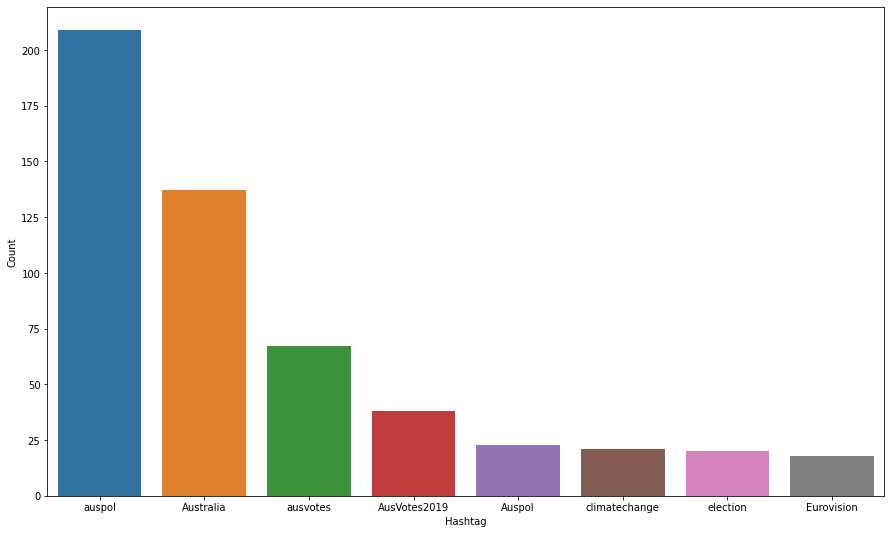

In [ ]:
d = d.nlargest(columns='Count',n=8)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag',y='Count')
plt.show()


In [ ]:
def getSubjectivity(clean_tweet):
    return TextBlob(clean_tweet).sentiment.subjectivity
# function polarity
def detPolarity(clean_tweet):
    return TextBlob(clean_tweet).sentiment.polarity

df['Subjectivity'] = df['clean_tweet'].apply(getSubjectivity)
df['Polarity'] = df['clean_tweet'].apply(detPolarity)


In [ ]:
def getSentiment(score):
    if score > 0 :
        return 'Positive'
    elif score == 0: 
        return 'Neutral'
    else:
        return 'Negative'


In [ ]:
df['Sentiment'] = df['Polarity'].apply(getSentiment)
df.to_csv('tweets_new.csv', index=False)


In [ ]:
df = pd.read_csv('tweets_new.csv')


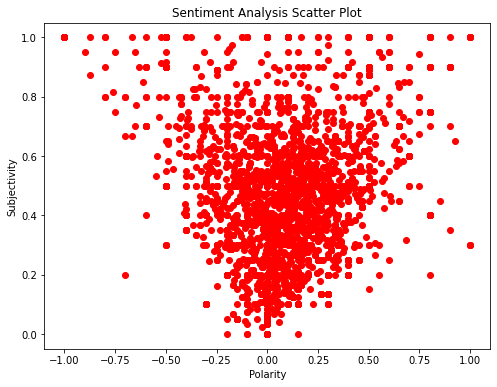

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Red')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


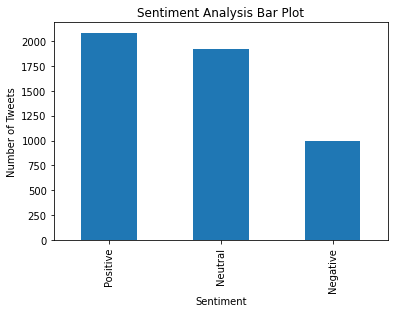

In [ ]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


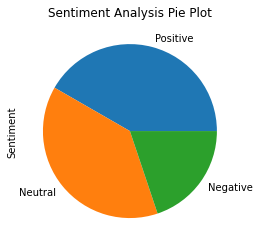

In [ ]:
df['Sentiment'].value_counts().plot(kind='pie')
plt.title('Sentiment Analysis Pie Plot')
plt.show()


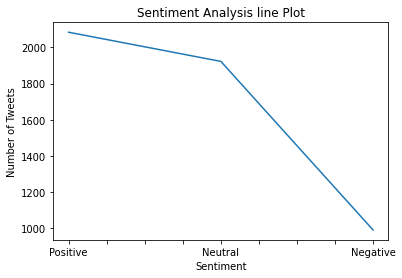

In [ ]:
df['Sentiment'].value_counts().plot(kind='line')
plt.title('Sentiment Analysis line Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


In [ ]:
df.tail(20)


,full_text,clean_tweet,Subjectivity,Polarity,Sentiment
4979,For opposition in this election. The so called...,opposition election called secular parties try...,0.000000,0.000000,Neutral
4980,Coalition declared winners in Australia's elec...,coalition declared winners australias election...,0.000000,0.000000,Neutral
4981,@krassenstein @realDonaldTrump @justinamash I ...,krassenstein realdonaldtrump justinamash dont ...,0.000000,0.000000,Neutral
4982,"""It Was Supposed to Be Australiaâs Climate C...",it supposed australiaâs climate change elect...,0.454545,0.136364,Positive
4983,Australia's SHOCK Election Result (Take Two) h...,australias shock election result take two http...,0.000000,0.000000,Neutral
4984,"""It Was Supposed to Be Australiaâs Climate C...",it supposed australiaâs climate change elect...,0.454545,0.136364,Positive
4985,"""It Was Supposed to Be Australiaâs Climate C...",it supposed australiaâs climate change elect...,0.454545,0.136364,Positive
4986,Conservatives back for another three gruelling...,conservatives back another three gruelling yea...,0.350000,-0.231250,Negative
4987,Australian federal election 2019: Anthony Alba...,australian federal election anthony albanese ...,0.250000,0.068182,Positive
4988,Teenagers on Australia's election: 'I wake up ...,teenagers australias election i wake morning a...,0.512500,-0.300000,Negative


In [ ]:
df['Sentiment'].value_counts()

Positive    2084
Neutral     1923
Negative     992
Name: Sentiment, dtype: int64

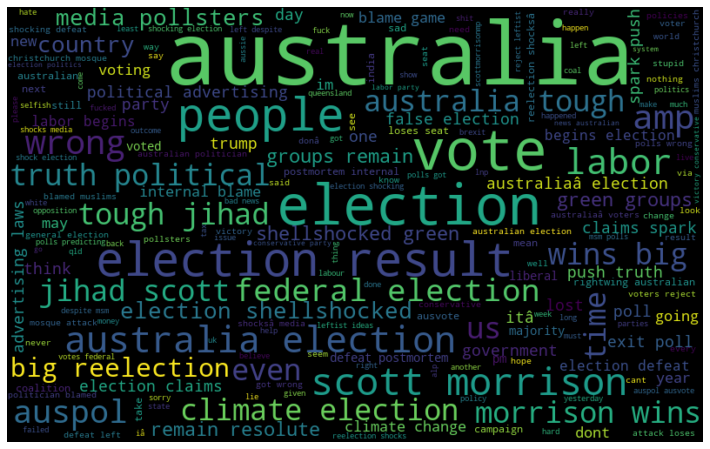

In [ ]:
all_words = " ".join([x for x in df['clean_tweet'][df['Sentiment']=='Negative']])

from wordcloud import WordCloud
word_cloud = WordCloud(width = 800, height=500, random_state = 42, max_font_size = 100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


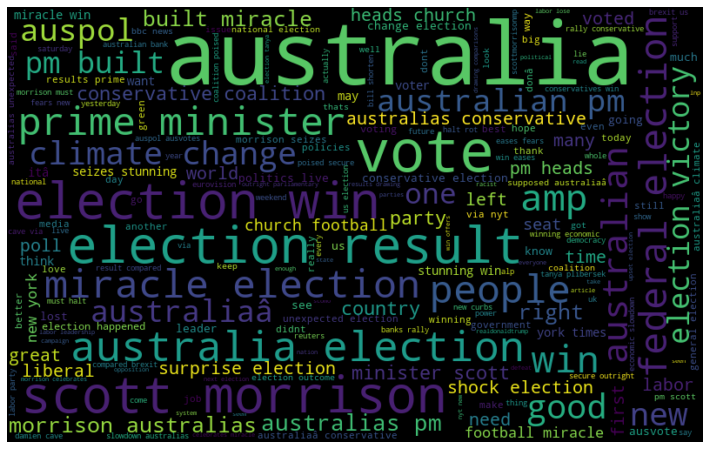

In [ ]:
all_words = " ".join([x for x in df['clean_tweet'][df['Sentiment']=='Positive']])

from wordcloud import WordCloud
word_cloud = WordCloud(width = 800, height=500, random_state = 42, max_font_size = 100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
X=df.clean_tweet
y=df.Sentiment


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)



In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))


No. of feature_words:  56153


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)


In [ ]:
def model_Evaluate(model):
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Neutral','Positive']
  sns.heatmap(cf_matrix, annot = True,linewidths=0.2, cmap = 'Blues',fmt = '.2f',
xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)




              precision    recall  f1-score   support

    Negative       0.90      0.20      0.33        44
     Neutral       0.72      0.90      0.80        90
    Positive       0.77      0.84      0.81       116

    accuracy                           0.75       250
   macro avg       0.80      0.65      0.65       250
weighted avg       0.77      0.75      0.72       250



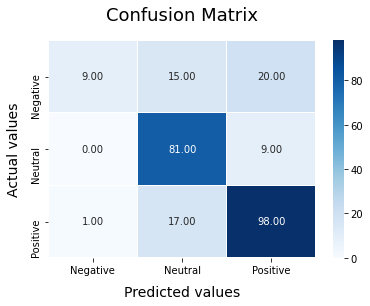

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)


              precision    recall  f1-score   support

    Negative       0.78      0.66      0.72        44
     Neutral       0.82      0.83      0.83        90
    Positive       0.84      0.89      0.87       116

    accuracy                           0.83       250
   macro avg       0.82      0.79      0.80       250
weighted avg       0.83      0.83      0.83       250



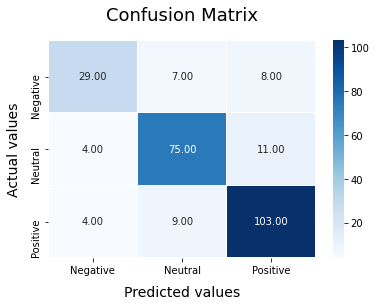

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)


              precision    recall  f1-score   support

    Negative       0.74      0.73      0.74        44
     Neutral       0.82      0.83      0.83        90
    Positive       0.86      0.86      0.86       116

    accuracy                           0.83       250
   macro avg       0.81      0.81      0.81       250
weighted avg       0.83      0.83      0.83       250



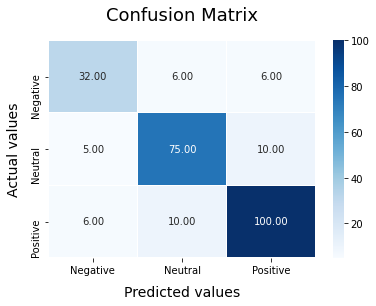

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)
